N: 5, Ratio: 1.6267391592462392
N: 6, Ratio: 1.41874517062821
N: 7, Ratio: 1.3394191849270864
N: 8, Ratio: 1.374142257574268
N: 9, Ratio: 1.4205513029265122
N: 10, Ratio: 1.3933800099990772
N: 11, Ratio: 1.394738953854848
N: 12, Ratio: 1.3680731971737607
N: 13, Ratio: 1.357050657487989
N: 14, Ratio: 1.2913245274757164
N: 15, Ratio: 1.267895538970167
N: 16, Ratio: 1.2582267063120762
N: 17, Ratio: 1.2960100962511436
N: 18, Ratio: 1.265085229076964
N: 19, Ratio: 1.293308828756645
N: 20, Ratio: 1.300595791599139
N: 21, Ratio: 1.301001552666568
N: 22, Ratio: 1.2836236375939043
N: 23, Ratio: 1.2841844836752547
N: 24, Ratio: 1.2454614170416354
N: 25, Ratio: 1.2445858021049752
N: 26, Ratio: 1.2486262908515247
N: 27, Ratio: 1.2468544300251116
N: 28, Ratio: 1.2197982816635569
N: 29, Ratio: 1.236476527091766
N: 30, Ratio: 1.1926556371564552
N: 31, Ratio: 1.1706607022074218
N: 32, Ratio: 1.1705004658154108
N: 33, Ratio: 1.1834763478445682
N: 34, Ratio: 1.1768208791037378
N: 35, Ratio: 1.1710219358

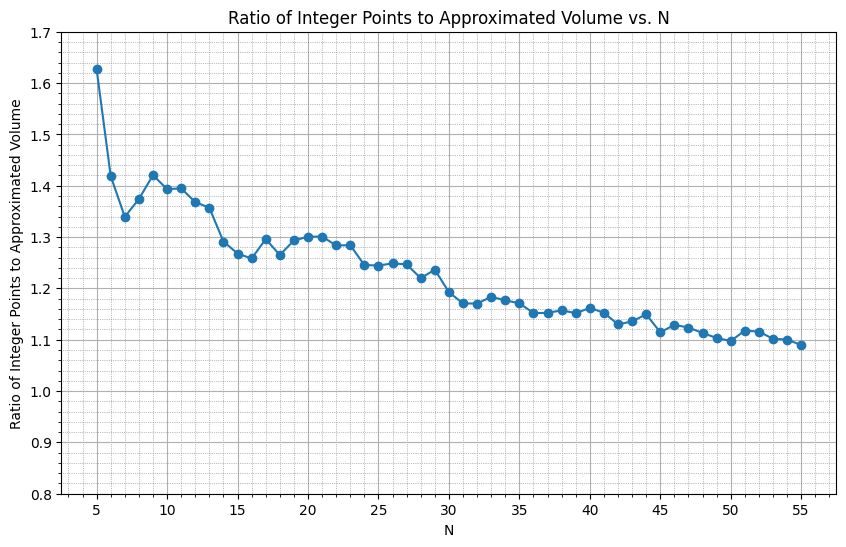

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic form
def Q(v):
    return v[0]**2 + v[1]**2 + np.sqrt(2) * v[2]**2 - v[3]**2

# Parameters
a, b = 7*np.pi-1 , 7*np.pi+1  # Interval
total_vectors = 10**8  # 100 million vectors for approximation

# Initialize lists to store results
Ns = range(5, 56)
ratios = []

for N in Ns:
    # Generate random uniform vectors
    vectors = np.random.uniform(-N, N, (total_vectors, 4))

    # Evaluate the quadratic form and count the number of vectors in the interval
    Q_values = Q(vectors.T)
    count_in_interval = np.sum((Q_values > a) & (Q_values < b))

    # Calculate the proportion and approximate volume
    proportion_in_interval = count_in_interval / total_vectors
    volume_of_hypercube = (2 * N)**4
    approximated_volume = proportion_in_interval * volume_of_hypercube

    # Calculate the numerator: count integer points in the given range
    numerator = 0
    for i in range(-N, N + 1):
        for j in range(-N, N + 1):
            for k in range(-N, N + 1):
                for l in range(-N, N + 1):
                    point = np.array([i, j, k, l])
                    Q_value = Q(point)
                    if a < Q_value < b:
                        numerator += 1

    # Calculate the ratio
    ratio = numerator / approximated_volume
    ratios.append(ratio)

    # Print the result for the current N
    print(f"N: {N}, Ratio: {ratio}")

# Plot the ratio vs. N
plt.figure(figsize=(10, 6))
plt.plot(Ns, ratios, marker='o')
plt.xlabel('N')
plt.ylabel('Ratio of Integer Points to Approximated Volume')
plt.title('Ratio of Integer Points to Approximated Volume vs. N')
plt.xticks(Ns[::5])  # Ensure major ticks are shown on the x-axis at every 5th value
plt.ylim(0.8, 1.7)  # Set the vertical axis range from 0.8 to 1.4
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()
